# E-commerce Customer Behavior and Business Performance Analysis

## 1️⃣ Project Title and Introduction:

Unveiling E-commerce Success: A Comprehensive Analysis of Customer Behavior, Order Patterns, and Revenue Optimization

**Introduction**:
This project analyzes a comprehensive e-commerce dataset to uncover insights about customer purchasing behavior, order fulfillment efficiency, payment preferences, and product performance. The analysis aims to provide actionable recommendations for improving customer satisfaction, optimizing delivery processes, and maximizing revenue growth. By examining the relationships between customers, orders, products, and payments, we'll identify key drivers of business success and areas for improvement.


## 2️⃣ Scoping Your Data Analysis Project

Big Questions to Explore:

*   What are the key factors that influence customer
purchase behavior and order value?

*   How efficient is the order fulfillment process, and what impacts delivery performance?

*   Which product categories and payment methods drive the highest revenue?

*   What geographic patterns exist in customer distribution and spending?

*   How do seasonal trends affect order volumes and customer acquisition?

*   What characteristics define high-value customers vs. one-time buyers?










In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Load the Datasets



*   Orders Table: order_status, order_purchase_timestamp, delivery timestamps

*   Order Items Table: price, shipping_charges, product_id, seller_id

*   Customers Table: customer_city, customer_state, customer_zip_code_prefix

*   Payments Table: payment_type, payment_installments, payment_value


*   Products Table: product_category_name, product dimensions and weight



In [4]:
print("\n📂 STARTING DATA PREPARATION...")

# Load all datasets
print("🔄 Loading datasets...")

# Update these file paths as needed for your environment
try:
    orders = pd.read_csv('df_Orders.csv')
    customers = pd.read_csv('df_Customers.csv')
    order_items = pd.read_csv('df_OrderItems.csv')
    products = pd.read_csv('df_Products.csv')
    payments = pd.read_csv('df_Payments.csv')

    print("✅ All datasets loaded successfully!")

    # Display basic info about each dataset
    datasets = {
        'Orders': orders,
        'Customers': customers,
        'Order Items': order_items,
        'Products': products,
        'Payments': payments
    }

    for name, df in datasets.items():
        print(f"📊 {name}: {df.shape[0]:,} rows, {df.shape[1]} columns")

except FileNotFoundError:
    print("❌ CSV files not found. Please ensure all files are in the correct directory:")
    print("   - orders.csv")
    print("   - customers.csv")
    print("   - order_items.csv")
    print("   - products.csv")
    print("   - payments.csv")



📂 STARTING DATA PREPARATION...
🔄 Loading datasets...
✅ All datasets loaded successfully!
📊 Orders: 89,316 rows, 7 columns
📊 Customers: 89,316 rows, 4 columns
📊 Order Items: 89,316 rows, 5 columns
📊 Products: 89,316 rows, 6 columns
📊 Payments: 89,316 rows, 5 columns


In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [6]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [7]:
order_items.head()

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [8]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


In [9]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


# Key Relationships to Explore:


*   Customer location vs. order value and delivery time

*   Product categories vs. revenue and customer preferences
*   Payment methods vs. order size and customer segments
*   Seasonal patterns vs. sales volume and product demand


*   Delivery performance vs. customer satisfaction (order status)






## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

**Check for missing values and duplicates in every datasets**




In [10]:
print("\n🧹 DATA CLEANING & TRANSFORMATION")

def clean_dataset(df, dataset_name):
  print(f"\n🔧 Scanning {dataset_name} dataset...")

  # Check for missing values
  missing_values = df.isnull().sum()
  if missing_values.any():
    print(f"⚠️ Missing values found:")
    for col, count in missing_values[missing_values > 0].items():
      print(f"  - {col}: {count} missing values")

  else:
    print(f"✅ No missing values found in {dataset_name} dataset.")

  # Check for duplicates
  duplicates = df.duplicated().sum()
  if duplicates > 0:
    print(f"⚠️ {duplicates} duplicate rows found in {dataset_name} dataset")
  else:
    print("✅ No duplicate rows found")

  return df

# Clean all datasets
if 'datasets' in locals():
    cleaned_datasets = {}
    for name, df in datasets.items():
        cleaned_datasets[name] = clean_dataset(df, name)

    # Update individual dataframes
    orders = cleaned_datasets['Orders']
    customers = cleaned_datasets['Customers']
    order_items = cleaned_datasets['Order Items']
    products = cleaned_datasets['Products']
    payments = cleaned_datasets['Payments']



🧹 DATA CLEANING & TRANSFORMATION

🔧 Scanning Orders dataset...
⚠️ Missing values found:
  - order_approved_at: 9 missing values
  - order_delivered_timestamp: 1889 missing values
✅ No duplicate rows found

🔧 Scanning Customers dataset...
✅ No missing values found in Customers dataset.
✅ No duplicate rows found

🔧 Scanning Order Items dataset...
✅ No missing values found in Order Items dataset.
✅ No duplicate rows found

🔧 Scanning Products dataset...
⚠️ Missing values found:
  - product_category_name: 308 missing values
  - product_weight_g: 15 missing values
  - product_length_cm: 15 missing values
  - product_height_cm: 15 missing values
  - product_width_cm: 15 missing values
⚠️ 61865 duplicate rows found in Products dataset

🔧 Scanning Payments dataset...
✅ No missing values found in Payments dataset.
✅ No duplicate rows found


**Missing Values Handling:**

*   Clean duplicated rows in Products dataset

In [11]:
# Perform removal on all rows with missing values in Products datasets
products.dropna(inplace=True)
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [12]:
# investigate unexpected amount of duplicated rows in products datasets
# Get a list of duplicated product IDs (duplicate product_ids would make entire analysis unreliable)
duplicated_product_ids = products[products.duplicated(subset='product_id')]['product_id'].unique()

# Display the first 5 product IDs that are duplicated
print("Examples of duplicated product IDs:")
for product_id in duplicated_product_ids[:5]:
    display(products[products['product_id'] == product_id])

Examples of duplicated product IDs:


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
55,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
293,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
379,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
1538,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
...,...,...,...,...,...,...
82321,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
83915,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
85028,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0
86593,DXG0TFaZjGHO,toys,200.0,16.0,7.0,11.0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
76,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0
168,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0
7262,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0
37852,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0
43103,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0
66178,G16XPtJuiBOe,toys,150.0,16.0,4.0,13.0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
33,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
186,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
916,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
1033,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
1309,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
...,...,...,...,...,...,...
88594,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
88841,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
88876,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0
89066,SLTlrWtcYt1m,toys,1750.0,37.0,22.0,40.0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
104,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
187,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
312,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
357,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
407,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
...,...,...,...,...,...,...
85563,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
87943,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
88306,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0
88506,GvBzGCvvIC2D,toys,1000.0,53.0,8.0,18.0


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
130,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
253,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
285,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
430,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
904,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
...,...,...,...,...,...,...
84783,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
84997,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
87334,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0
88293,8EMcxO7AFhVP,toys,180.0,17.0,10.0,13.0


In [13]:
# Drop duplicate rows based on 'product_id', keeping the first occurrence
products_cleaned = products.drop_duplicates(subset='product_id', keep='first').copy()

print(f"Original products dataset shape: {products.shape}")
print(f"Cleaned products dataset shape: {products_cleaned.shape}")

products = products_cleaned

Original products dataset shape: (88993, 6)
Cleaned products dataset shape: (27308, 6)


### Data Manipulation and Data Transformation:







*   Perform string standardization
*   Perform Datetime Conversion



In [14]:
# 1. STANDARDIZE STRING COLUMNS
def standardize_string_columns(df, string_columns):
    """
    Standardize string columns: lowercase, strip whitespace, handle nulls
    """
    df_clean = df.copy()

    for col in string_columns:
        if col in df_clean.columns:
            print(f"Standardizing {col}...")
            # Convert to string, lowercase, strip whitespace
            df_clean[col] = df_clean[col].astype(str).str.lower().str.strip()
            # Handle 'nan' strings back to actual NaN
            df_clean[col] = df_clean[col].replace('nan', pd.NA)

    return df_clean

# 2. CONVERT DATETIME COLUMNS
def convert_datetime_columns(df, datetime_columns):
    """
    Convert specified columns to datetime format
    """
    df_clean = df.copy()

    for col in datetime_columns:
        if col in df_clean.columns:
            print(f"Converting {col} to datetime...")
            df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
            # Show how many failed to convert
            failed_conversions = df_clean[col].isnull().sum()
            print(f"  - {failed_conversions} values couldn't be converted (set to NaT)")

    return df_clean

# USAGE FOR E-COMMERCE DATASET:

# Define column groups
STRING_COLUMNS = [
    'order_status',           # orders
    'customer_city',          # customers
    'customer_state',         # customers
    'payment_type',           # payments
    'product_category_name'   # products
]

DATETIME_COLUMNS = [
    'order_purchase_timestamp',      # orders
    'order_approved_at',             # orders
    'order_delivered_timestamp',     # orders
    'order_estimated_delivery_date'  # orders
]

# Apply to datasets:

# for orders dataset
orders_clean = orders.copy()
orders_clean = convert_datetime_columns(orders_clean, DATETIME_COLUMNS)
orders_clean = standardize_string_columns(orders_clean, ['order_status'])

#  for customers dataset
customers_clean = customers.copy()
customers_clean = standardize_string_columns(customers_clean, ['customer_city', 'customer_state'])

#  for products dataset
products_clean = products.copy()
products_clean = standardize_string_columns(products_clean, ['product_category_name'])

#  for payments dataset
payments_clean = payments.copy()
payments_clean = standardize_string_columns(payments_clean, ['payment_type'])

print("All datasets standardized!")


Converting order_purchase_timestamp to datetime...
  - 0 values couldn't be converted (set to NaT)
Converting order_approved_at to datetime...
  - 9 values couldn't be converted (set to NaT)
Converting order_delivered_timestamp to datetime...
  - 1889 values couldn't be converted (set to NaT)
Converting order_estimated_delivery_date to datetime...
  - 0 values couldn't be converted (set to NaT)
Standardizing order_status...
Standardizing customer_city...
Standardizing customer_state...
Standardizing product_category_name...
Standardizing payment_type...
All datasets standardized!


- Create new columns that are helpful for data analysis

New Columns to Create:


1.   delivery_time_days: Calculate days between order and delivery

1.   order_month/quarter: Extract temporal features for seasonality analysis

1.   total_order_value: Sum of item prices + shipping per order







In [15]:
orders = orders_clean
customers = customers_clean
products = products_clean
payments = payments_clean

In [16]:
#Keeping missing values for 'order_delivered_timestamp' columnn in orders dataset because they're logically correct
#Orders that are "processing", "shipped", "approved" etc. shouldn't have delivery timestamps yet..

def simple_delivery_cleanup(orders):
    """
    Simple cleanup focused on business analysis needs
    """

    # Create a simple delivery status for business analysis
    def get_delivery_status(row):
        if row['order_status'] == 'delivered':
            return 'completed'
        elif row['order_status'] == 'canceled':
            return 'canceled'
        else:
            return 'pending'  # shipped, processing, invoiced, unavailable, approved

    orders['delivery_status'] = orders.apply(get_delivery_status, axis=1)

    # For delivered orders, calculate delivery time if both timestamps exist
    delivered_mask = (orders['order_status'] == 'delivered') & \
                    orders['order_delivered_timestamp'].notna() & \
                    orders['order_approved_at'].notna()

    if delivered_mask.sum() > 0:
        orders.loc[delivered_mask, 'delivery_days'] = (
            pd.to_datetime(orders.loc[delivered_mask, 'order_delivered_timestamp']) -
            pd.to_datetime(orders.loc[delivered_mask, 'order_approved_at'])
        ).dt.days

    print(f"Orders by delivery status:")
    print(orders['delivery_status'].value_counts())

    return orders


orders_clean = simple_delivery_cleanup(orders)

# For business analysis, filter to:
completed_orders = orders_clean[orders_clean['delivery_status'] == 'completed']

# For revenue analysis
all_orders = orders_clean

print("\nNew Columns created in Orders: \n ✅delivery_status, ✅delivery_days")

Orders by delivery status:
delivery_status
completed    87428
pending       1479
canceled       409
Name: count, dtype: int64

New Columns created in Orders: 
 ✅delivery_status, ✅delivery_days


In [17]:
# Extract month and quarter
orders['order_month'] = orders['order_purchase_timestamp'].dt.month
orders['order_quarter'] = orders['order_purchase_timestamp'].dt.quarter

print("New columns ✅'order_month' and ✅'order_quarter' added to the orders DataFrame.")

display(orders[['order_purchase_timestamp', 'order_month', 'order_quarter']].head())

New columns ✅'order_month' and ✅'order_quarter' added to the orders DataFrame.


,order_purchase_timestamp,order_month,order_quarter
0,2017-10-22 18:57:54,10,4
1,2018-06-20 21:40:31,6,2
2,2018-02-16 16:19:31,2,1
3,2018-08-18 18:04:29,8,3
4,2017-12-22 16:44:04,12,4


In [18]:
# Create new column total_product_price in order_items dataset
order_items['total_product_price'] = order_items['price'] + order_items['shipping_charges']
print("New column ✅'total_product_price' added to the order_items DataFrame.")
display(order_items[['order_id', 'price', 'shipping_charges', 'total_product_price']].head())


New column ✅'total_product_price' added to the order_items DataFrame.


,order_id,price,shipping_charges,total_product_price
0,Axfy13Hk4PIk,223.51,84.65,308.16
1,v6px92oS8cLG,170.80,23.79,194.59
2,Ulpf9skrhjfm,64.40,17.38,81.78
3,bwJVWupf2keN,264.50,30.72,295.22
4,Dd0QnrMk9Cj5,779.90,30.66,810.56


### Data Joining:

Join the datasets using a unique identifier.

Join Strategy:


1.   Master Dataset: Join all tables using order_id and customer_id





In [19]:
print("\n 📥 DATA JOINING")

# Join all datasets using unique identifiers
print("\n🔄 Joining datasets...")

# Start with order as the base table
master_df = orders.copy()
print(f"\n✅Base table: {master_df.shape[0]:,} rows, {master_df.shape[1]} columns")

# Join with customers
master_df = master_df.merge(customers, on='customer_id', how='left')
print(f"\n✅Joined with Customers: {master_df.shape[0]:,} rows, {master_df.shape[1]} columns")

# Join with order_items
master_df = master_df.merge(order_items, on='order_id', how='left')
print(f"\n✅Joined with Order Items: {master_df.shape[0]:,} rows, {master_df.shape[1]} columns")

# Join with products
master_df = master_df.merge(products, on='product_id', how='left')
print(f"\n✅Joined with Products: {master_df.shape[0]:,} rows, {master_df.shape[1]} columns")

#Join with payments (aggregate first to avoid duplication)
payments_agg = payments.groupby('order_id').agg({
        'payment_type': 'first',
        'payment_value': 'sum',
        'payment_installments': 'max'
    }).reset_index()

master_df = master_df.merge(payments_agg, on='order_id', how='left')
print(f"\n✅Joined with Payments: {master_df.shape[0]:,} rows, {master_df.shape[1]} columns")

print("\n✅ DATA JOINING COMPLETED")
print(f"\n✅ Final dataset: {master_df.shape[0]:,} rows, {master_df.shape[1]} columns :\n")

master_df.head()
master_df.to_csv('Cleaned & Merged Ecommerce Dataset.csv', index=False)


 📥 DATA JOINING

🔄 Joining datasets...

✅Base table: 89,316 rows, 11 columns

✅Joined with Customers: 89,316 rows, 14 columns

✅Joined with Order Items: 89,316 rows, 19 columns

✅Joined with Products: 89,316 rows, 24 columns

✅Joined with Payments: 89,316 rows, 27 columns

✅ DATA JOINING COMPLETED

✅ Final dataset: 89,316 rows, 27 columns :



In [20]:
# Check the date range in your dataset
print("📅 DATASET DATE RANGE")
print("="*50)

# Convert to datetime if not already done
master_df['order_purchase_timestamp'] = pd.to_datetime(master_df['order_purchase_timestamp'])

# Get the date range
start_date = master_df['order_purchase_timestamp'].min()
end_date = master_df['order_purchase_timestamp'].max()

print(f"📅 First Order: {start_date.strftime('%B %d, %Y')}")
print(f"📅 Latest Order: {end_date.strftime('%B %d, %Y')}")
print(f"📅 Date Range: {start_date.year} - {end_date.year}")
print(f"📅 Total Period: {(end_date - start_date).days} days")

# Quick year breakdown
print(f"\n📊 Orders by Year:")
yearly_orders = master_df['order_purchase_timestamp'].dt.year.value_counts().sort_index()
print(yearly_orders)

📅 DATASET DATE RANGE
📅 First Order: September 04, 2016
📅 Latest Order: September 03, 2018
📅 Date Range: 2016 - 2018
📅 Total Period: 728 days

📊 Orders by Year:
order_purchase_timestamp
2016      293
2017    41124
2018    47899
Name: count, dtype: int64


## 4️⃣ Exploratory Data Analysis

**Descriptive Analysis**


1.   Overall Business Metrics:

*   Total revenue, orders, and customers

*   Average order value and customer lifetime value
*   Order status distribution


*   Geographic distribution of customers

*   Popular product categories and payment methods








In [21]:
print("📊 OVERALL BUSINESS METRICS")
print("="*50)

# 1. Total Revenue, Orders, and Customers
total_revenue = master_df['total_product_price'].sum()
total_orders = master_df['order_id'].nunique()
total_customers = master_df['customer_id'].nunique()

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")

# 2. Average Order Value
average_order_value = master_df['total_product_price'].mean()
print(f"Average Order Value: ${average_order_value:.2f}")

# 3. Order Status Distribution
print("\nOrder Status Distribution:")
order_status_counts = master_df['order_status'].value_counts()
print(order_status_counts)

# 4. Geographic Distribution of Customers (Top 10 States)
print("\nTop 10 Customer States:")
top_customer_states = master_df['customer_state'].value_counts().head(10)
print(top_customer_states)

# 5. Popular Product Categories (Top 10 by order count)
print("\nTop 10 Product Categories by Order Count:")
popular_categories = master_df['product_category_name'].value_counts().head(10)
print(popular_categories)

# 6. Popular Payment Methods
print("\nPayment Method Distribution:")
payment_method_counts = master_df['payment_type'].value_counts()
print(payment_method_counts)

📊 OVERALL BUSINESS METRICS
Total Revenue: $34,403,072.06
Total Orders: 89,316
Total Customers: 89,316
Average Order Value: $385.18

Order Status Distribution:
order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64

Top 10 Customer States:
customer_state
sp    37879
rj    11578
mg    10334
rs     4921
pr     4523
sc     3213
ba     3088
go     1868
es     1798
df     1793
Name: count, dtype: int64

Top 10 Product Categories by Order Count:
product_category_name
toys                     67012
health_beauty             2351
bed_bath_table            2146
sports_leisure            1837
furniture_decor           1760
computers_accessories     1715
housewares                1340
watches_gifts             1196
telephony                  912
auto                       829
Name: count, dtype: int64

Payment Method Distribution:
payment_type
credit_card    65814
wall

### Data Visualisation:
- Visualise data in graphs to better understand the data.




# What are the key factors that influence customer purchase behavior and order value?

🛒 CUSTOMER PURCHASE BEHAVIOR FACTORS


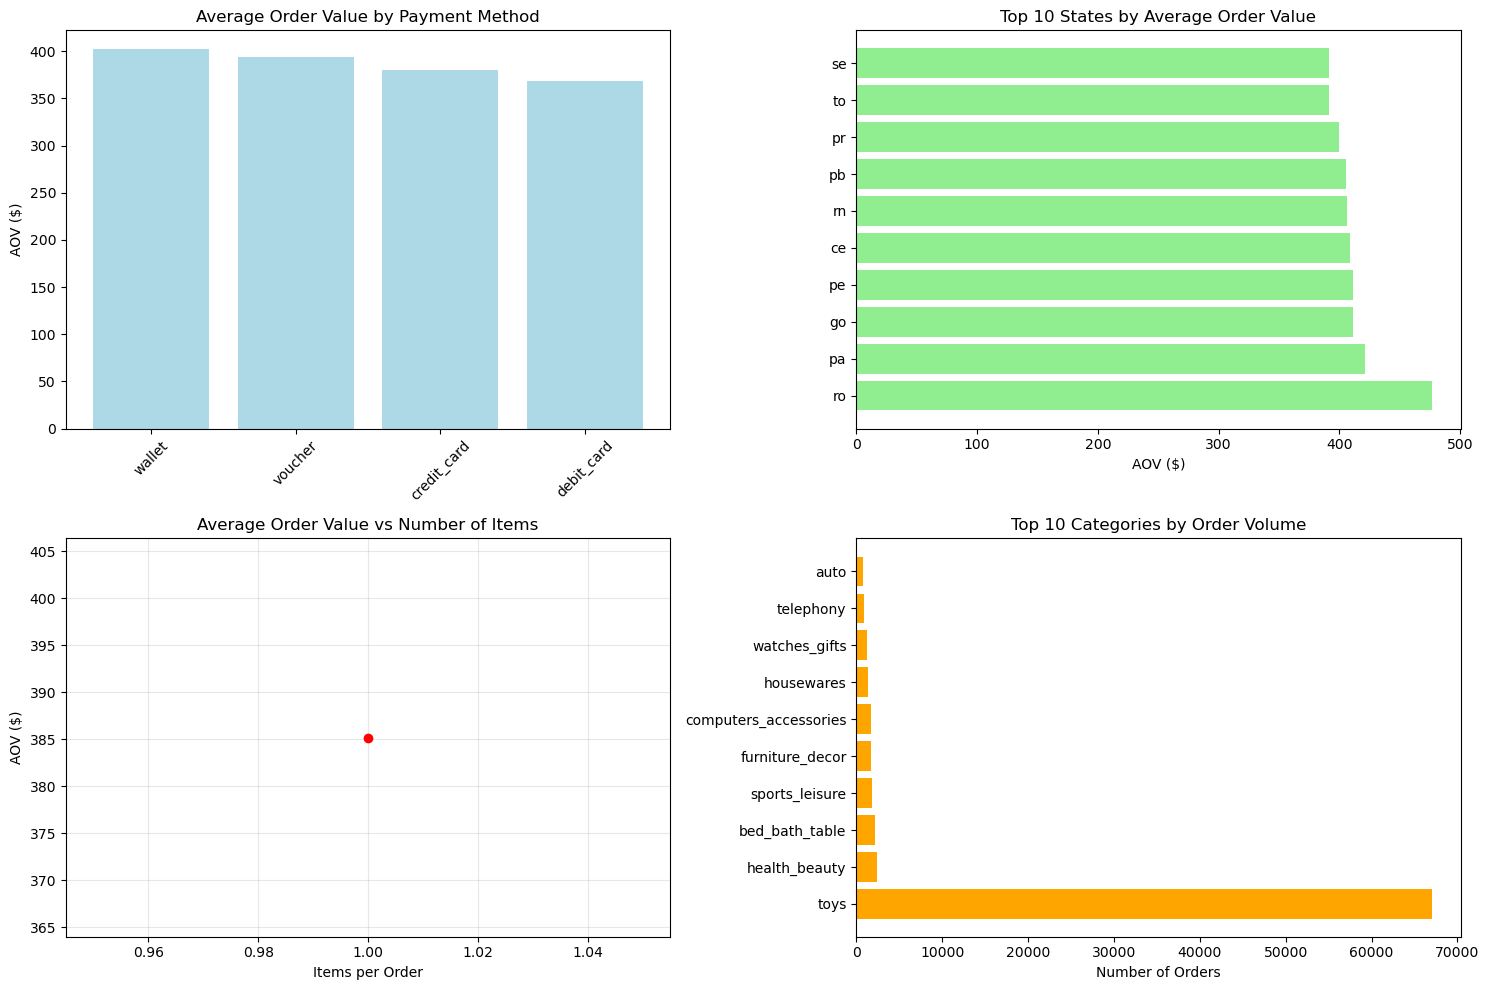

KEY FACTORS INFLUENCING PURCHASE BEHAVIOR:
• Payment method impact: wallet users spend most ($402.08 AOV)
• Geographic factor: ro has highest AOV ($476.41)
• Basket size: More items = higher order value (correlation)


In [22]:
print("🛒 CUSTOMER PURCHASE BEHAVIOR FACTORS")
print("="*50)

# Calculate total_order_value in master_df if not already present
# This is needed because the merge might not have carried it over correctly
if 'total_order_value' not in master_df.columns:
    # Ensure 'price' and 'shipping_charges' are in master_df from the order_items merge
    if 'price' in master_df.columns and 'shipping_charges' in master_df.columns:
        master_df['total_order_value'] = master_df['price'] + master_df['shipping_charges']
    else:
        print("Error: 'price' or 'shipping_charges' columns not found in master_df to calculate 'total_order_value'.")
        # Handle this case, maybe by re-merging or checking previous steps.
        # For now, we'll stop to avoid further errors.
        # You might need to re-run the merge cell (a1b3bd19) if order_items wasn't merged correctly.
        raise KeyError("'price' or 'shipping_charges' missing in master_df")


# Analyze order value by different factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Factor 1: Payment method vs Order value
payment_aov = master_df.groupby('payment_type')['total_order_value'].mean().sort_values(ascending=False)
axes[0, 0].bar(payment_aov.index, payment_aov.values, color='lightblue')
axes[0, 0].set_title('Average Order Value by Payment Method')
axes[0, 0].set_ylabel('AOV ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Factor 2: State vs Order value (top 10)
state_aov = master_df.groupby('customer_state')['total_order_value'].mean().sort_values(ascending=False).head(10)
axes[0, 1].barh(range(len(state_aov)), state_aov.values, color='lightgreen')
axes[0, 1].set_title('Top 10 States by Average Order Value')
axes[0, 1].set_xlabel('AOV ($)')
axes[0, 1].set_yticks(range(len(state_aov)))
axes[0, 1].set_yticklabels(state_aov.index)

# Factor 3: Items per order vs Order value
# Calculate items per order *before* grouping by order_id for AOV
# This assumes each row in master_df after merge is one item in an order.
# If an order has multiple items, they will appear as multiple rows with the same order_id.
# To get items per *order*, we should group by order_id and count rows.

order_item_counts = master_df.groupby('order_id').size().reset_index(name='items_per_order')

# Merge this count back to the master_df based on order_id
master_df_with_item_counts = pd.merge(master_df, order_item_counts, on='order_id', how='left')

# Now group by the calculated items_per_order and find the mean total_order_value
# Note: This will average AOV for orders with the same number of items.
# Be mindful of the structure: if master_df has multiple rows per order,
# the AOV calculation should be done per order first, then averaged by item count.
# Let's calculate AOV per order first, then analyze by item count.

order_aov = master_df_with_item_counts.groupby('order_id').agg(
    aov=('total_order_value', 'first'), # AOV is the same for all items in an order
    items_per_order=('items_per_order', 'first') # Items per order is also the same
).reset_index()

items_aov = order_aov.groupby('items_per_order')['aov'].mean().head(10)

axes[1, 0].plot(items_aov.index, items_aov.values, marker='o', color='red')
axes[1, 0].set_title('Average Order Value vs Number of Items')
axes[1, 0].set_xlabel('Items per Order')
axes[1, 0].set_ylabel('AOV ($)')
axes[1, 0].grid(True, alpha=0.3)

# Factor 4: Product category vs Order frequency
# Use the 'product_category_name' column from master_df directly
category_orders = master_df['product_category_name'].value_counts().head(10)
axes[1, 1].barh(range(len(category_orders)), category_orders.values, color='orange')
axes[1, 1].set_title('Top 10 Categories by Order Volume')
axes[1, 1].set_xlabel('Number of Orders')
axes[1, 1].set_yticks(range(len(category_orders)))
axes[1, 1].set_yticklabels(category_orders.index)

plt.tight_layout()
plt.show()

print("KEY FACTORS INFLUENCING PURCHASE BEHAVIOR:")
print(f"• Payment method impact: {payment_aov.index[0]} users spend most (${payment_aov.iloc[0]:.2f} AOV)")
print(f"• Geographic factor: {state_aov.index[0]} has highest AOV (${state_aov.iloc[0]:.2f})")
print(f"• Basket size: More items = higher order value (correlation)")

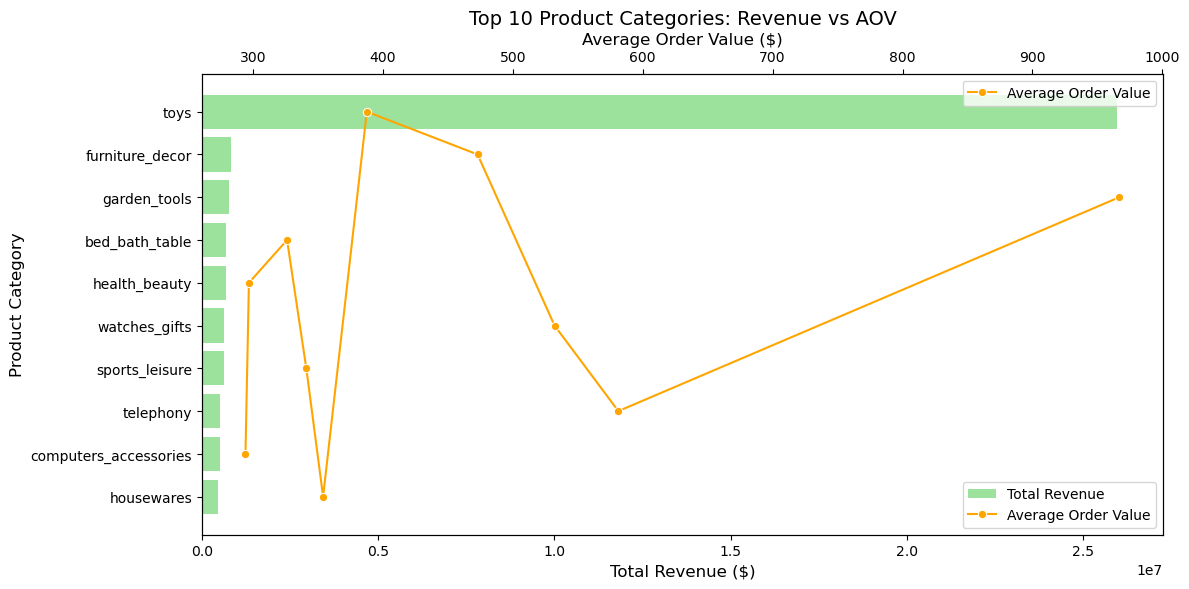

In [23]:
# Product Category Analysis with Legend (Revenue vs AOV)

category_summary = master_df.groupby('product_category_name').agg(
    order_count=('order_id', 'nunique'),
    total_revenue=('total_order_value', 'sum'),
    avg_order_value=('total_order_value', 'mean')
).reset_index()

# Take top 10 categories by revenue
category_summary = category_summary.sort_values(by='total_revenue', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for revenue
barplot = sns.barplot(
    y='product_category_name',
    x='total_revenue',
    data=category_summary,
    ax=ax1,
    color='lightgreen',
    label='Total Revenue'
)
ax1.set_xlabel("Total Revenue ($)", fontsize=12)
ax1.set_ylabel("Product Category", fontsize=12)

# Secondary axis for AOV line
ax2 = ax1.twiny()
lineplot = sns.lineplot(
    y='product_category_name',
    x='avg_order_value',
    data=category_summary,
    ax=ax2,
    color='orange',
    marker='o',
    label='Average Order Value'
)
ax2.set_xlabel("Average Order Value ($)", fontsize=12)

# --- Combine legends from both axes ---
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower right', frameon=True)

plt.title("Top 10 Product Categories: Revenue vs AOV", fontsize=14)
plt.tight_layout()
plt.show()


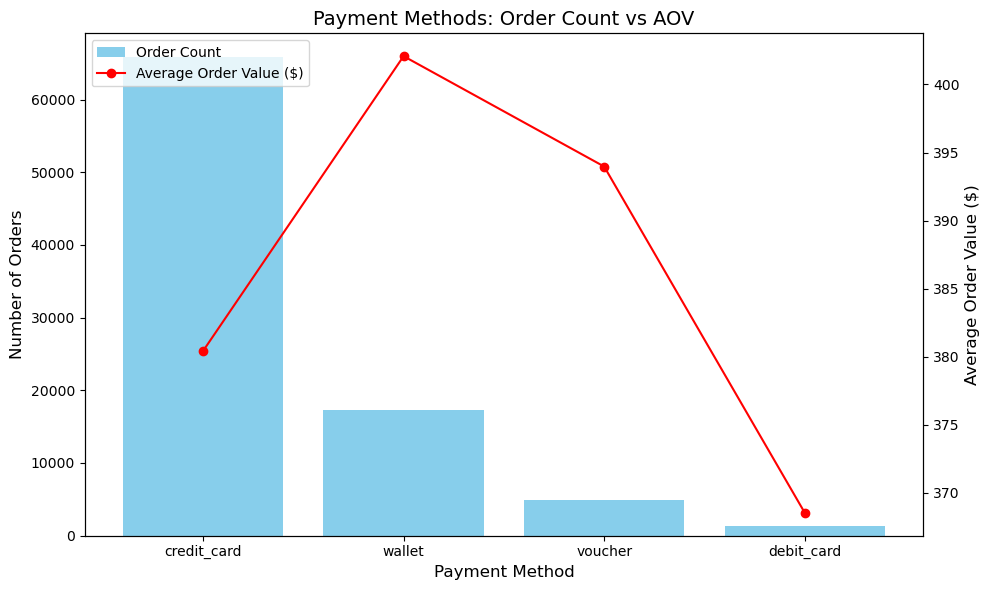

In [24]:
# Payment Method Analysis with Legends
payment_summary = master_df.groupby('payment_type').agg(
    order_count=('order_id', 'nunique'),
    total_revenue=('total_order_value', 'sum'),
    avg_order_value=('total_order_value', 'mean')
).reset_index()

payment_summary = payment_summary.sort_values(by='total_revenue', ascending=False)

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for order count
bars = ax1.bar(payment_summary['payment_type'], payment_summary['order_count'],
               color='skyblue', label='Order Count')
ax1.set_ylabel("Number of Orders", fontsize=12)
ax1.set_xlabel("Payment Method", fontsize=12)

# Line chart for AOV (secondary y-axis)
ax2 = ax1.twinx()
line = ax2.plot(payment_summary['payment_type'], payment_summary['avg_order_value'],
                color='red', marker='o', label='Average Order Value ($)')
ax2.set_ylabel("Average Order Value ($)", fontsize=12)

# Combine legends from both axes
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

plt.title("Payment Methods: Order Count vs AOV", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# How efficient is the order fulfillment process, and what impacts delivery performance?


🚚 ORDER FULFILLMENT EFFICIENCY


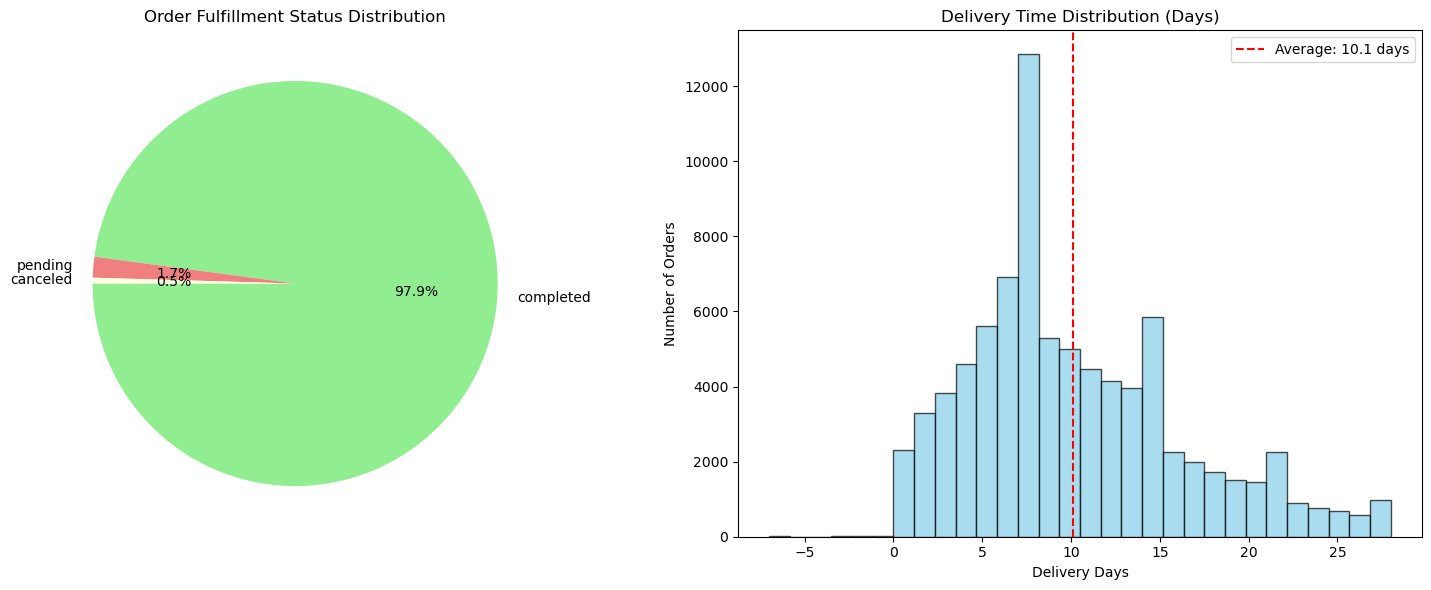

ORDER FULFILLMENT INSIGHTS:
• Order completion rate: 97.9%
• Total orders processed: 89,316


In [25]:
print("\n🚚 ORDER FULFILLMENT EFFICIENCY")
print("="*50)

# Delivery performance analysis
completed_orders = master_df[master_df['delivery_status'] == 'completed'].copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Delivery performance by status
delivery_status_counts = master_df['delivery_status'].value_counts()
axes[0].pie(delivery_status_counts.values, labels=delivery_status_counts.index,
           autopct='%1.1f%%', startangle=180, colors=['lightgreen', 'lightcoral', 'lightyellow'])
axes[0].set_title('Order Fulfillment Status Distribution')

# Delivery time analysis (if available)
if 'delivery_days' in master_df.columns and completed_orders['delivery_days'].notna().sum() > 0:
    # Remove outliers for better visualization
    delivery_times = completed_orders['delivery_days'].dropna()
    delivery_times_clean = delivery_times[delivery_times <= delivery_times.quantile(0.95)]

    axes[1].hist(delivery_times_clean, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[1].set_title('Delivery Time Distribution (Days)')
    axes[1].set_xlabel('Delivery Days')
    axes[1].set_ylabel('Number of Orders')
    axes[1].axvline(delivery_times_clean.mean(), color='red', linestyle='--',
                   label=f'Average: {delivery_times_clean.mean():.1f} days')
    axes[1].legend()
else:
    # Alternative: Delivery by state
    state_delivery = master_df.groupby('customer_state')['delivery_status'].apply(
        lambda x: (x == 'completed').sum() / len(x) * 100).sort_values(ascending=False).head(10)
    axes[1].barh(range(len(state_delivery)), state_delivery.values, color='lightblue')
    axes[1].set_title('Top 10 States by Delivery Success Rate (%)')
    axes[1].set_xlabel('Completion Rate (%)')
    axes[1].set_yticks(range(len(state_delivery)))
    axes[1].set_yticklabels(state_delivery.index)

plt.tight_layout()
plt.show()

completion_rate = (delivery_status_counts.get('completed', 0) / delivery_status_counts.sum()) * 100
print(f"ORDER FULFILLMENT INSIGHTS:")
print(f"• Order completion rate: {completion_rate:.1f}%")
print(f"• Total orders processed: {delivery_status_counts.sum():,}")


Average delivery time: 11.3 days
Fast (<7 days): 30.5% of orders
Delayed (>15 days): 21.8% of orders


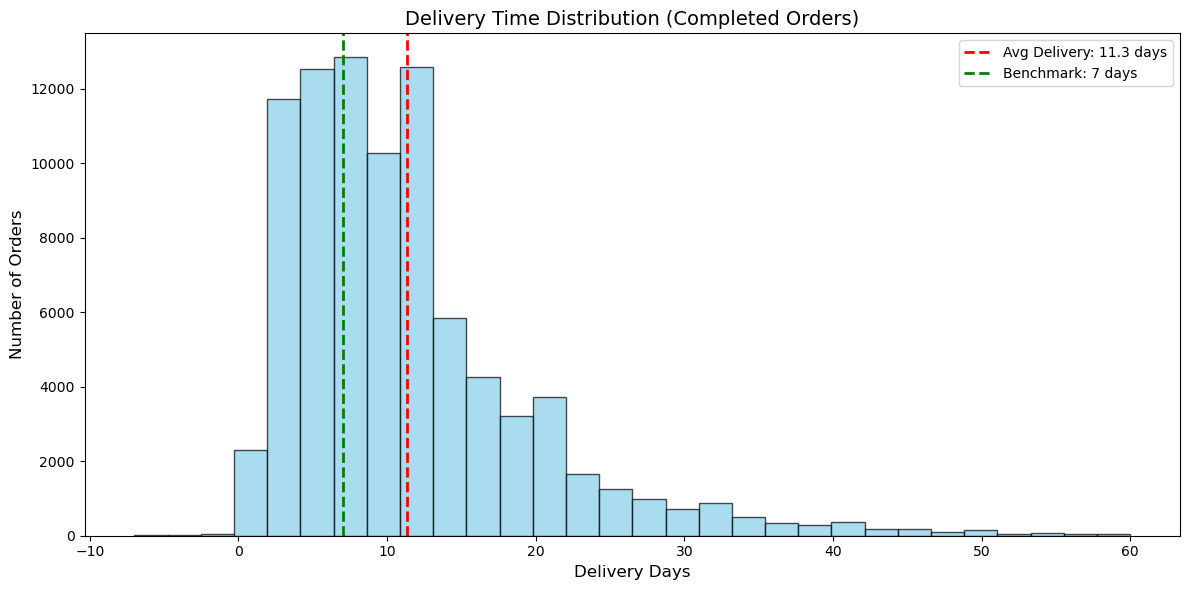

In [26]:
# --- DELIVERY TIME PERFORMANCE VISUALIZATION ---

# Focus only on completed orders with valid delivery_days
completed_orders = master_df[(master_df['delivery_status'] == 'completed') &
                             (master_df['delivery_days'].notna())].copy()

# Clean out extreme outliers (> 60 days)
delivery_times = completed_orders['delivery_days']
delivery_times = delivery_times[delivery_times <= 60]

# Calculate metrics
avg_days = delivery_times.mean()
fast_pct = (delivery_times < 7).mean() * 100
delayed_pct = (delivery_times > 15).mean() * 100

print(f"Average delivery time: {avg_days:.1f} days")
print(f"Fast (<7 days): {fast_pct:.1f}% of orders")
print(f"Delayed (>15 days): {delayed_pct:.1f}% of orders")

# --- Plot Histogram ---
plt.figure(figsize=(12,6))
plt.hist(delivery_times, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Mean line
plt.axvline(avg_days, color='red', linestyle='--', linewidth=2,
            label=f'Avg Delivery: {avg_days:.1f} days')

# Benchmark line (industry ~7 days)
plt.axvline(7, color='green', linestyle='--', linewidth=2,
            label='Benchmark: 7 days')

plt.title("Delivery Time Distribution (Completed Orders)", fontsize=14)
plt.xlabel("Delivery Days", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


# What geographic patterns exist in customer distribution and spending?


🗺️ GEOGRAPHIC CUSTOMER PATTERNS


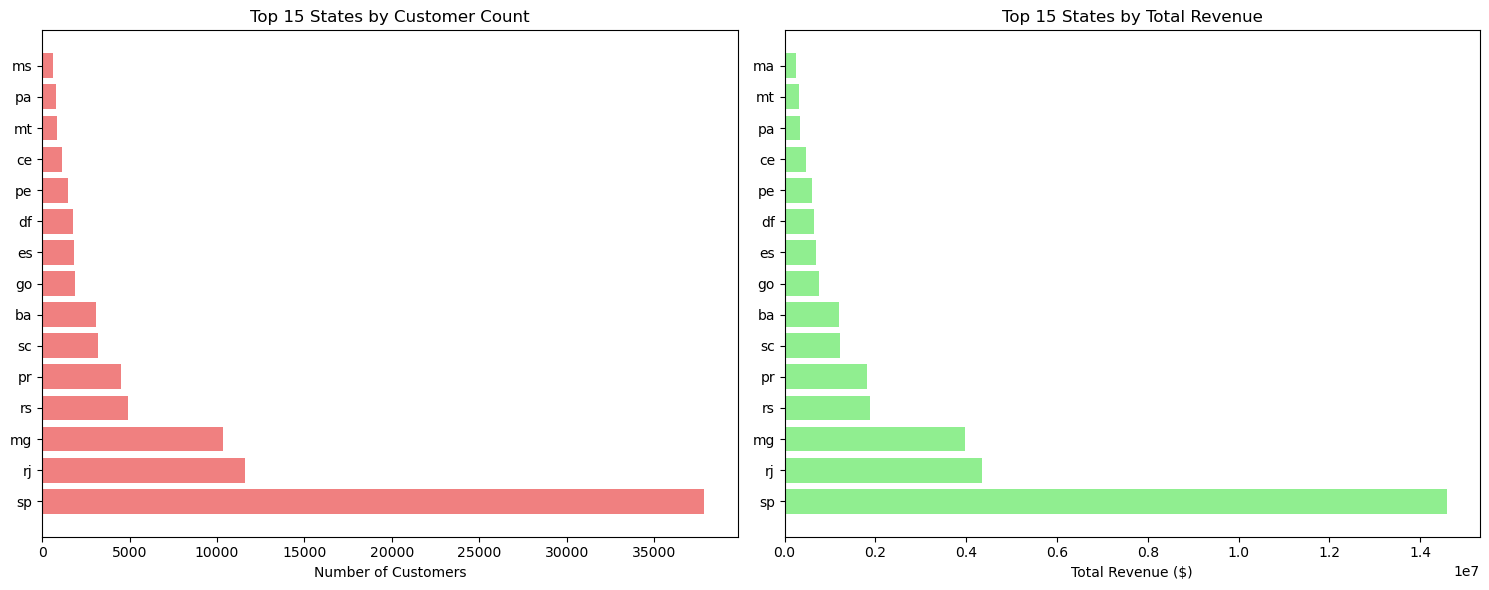

GEOGRAPHIC INSIGHTS:
• Top customer state: sp (37,879 customers)
• Top revenue state: sp ($14,586,002.19)
• Geographic concentration: Top 5 states = 69,235 customers (80.6% of total)


In [27]:
print("\n🗺️ GEOGRAPHIC CUSTOMER PATTERNS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Customer distribution by state
customer_distribution = master_df['customer_state'].value_counts().head(15)
axes[0].barh(range(len(customer_distribution)), customer_distribution.values, color='lightcoral')
axes[0].set_title('Top 15 States by Customer Count')
axes[0].set_xlabel('Number of Customers')
axes[0].set_yticks(range(len(customer_distribution)))
axes[0].set_yticklabels(customer_distribution.index)

# Revenue by state
state_revenue = master_df.groupby('customer_state')['total_order_value'].sum().sort_values(ascending=False).head(15)
axes[1].barh(range(len(state_revenue)), state_revenue.values, color='lightgreen')
axes[1].set_title('Top 15 States by Total Revenue')
axes[1].set_xlabel('Total Revenue ($)')
axes[1].set_yticks(range(len(state_revenue)))
axes[1].set_yticklabels(state_revenue.index)

plt.tight_layout()
plt.show()

print("GEOGRAPHIC INSIGHTS:")
print(f"• Top customer state: {customer_distribution.index[0]} ({customer_distribution.iloc[0]:,} customers)")
print(f"• Top revenue state: {state_revenue.index[0]} (${state_revenue.iloc[0]:,.2f})")
print(f"• Geographic concentration: Top 5 states = {customer_distribution.head(5).sum():,} customers ({customer_distribution.head(5).sum()/customer_distribution.sum()*100:.1f}% of total)")


**Revenue & Sales Analysis:**


1.   Revenue Trends: Time series of monthly/quarterly revenue

1.   Category Performance: Horizontal bar chart of revenue by product category
2.   Average Order Value Trends: Line chart over time with seasonal patterns


2.   Payment Method Preferences: Pie chart and trend analysis



In [28]:
print("💰 REVENUE & SALES ANALYSIS")
print("Let's analyze our business performance...")

# First, let's calculate total revenue per order
# I need to make sure we have revenue data
if 'total_product_price' not in master_df.columns:
    master_df['total_order_value'] = master_df['price'] + master_df['shipping_charges']
else:
    master_df['total_order_value'] = master_df['total_product_price']

print(f"Total revenue in dataset: ${master_df['total_order_value'].sum():,.2f}")
print(f"Average order value: ${master_df['total_order_value'].mean():.2f}")


💰 REVENUE & SALES ANALYSIS
Let's analyze our business performance...
Total revenue in dataset: $34,403,072.06
Average order value: $385.18



📈 1. MONTHLY REVENUE TRENDS


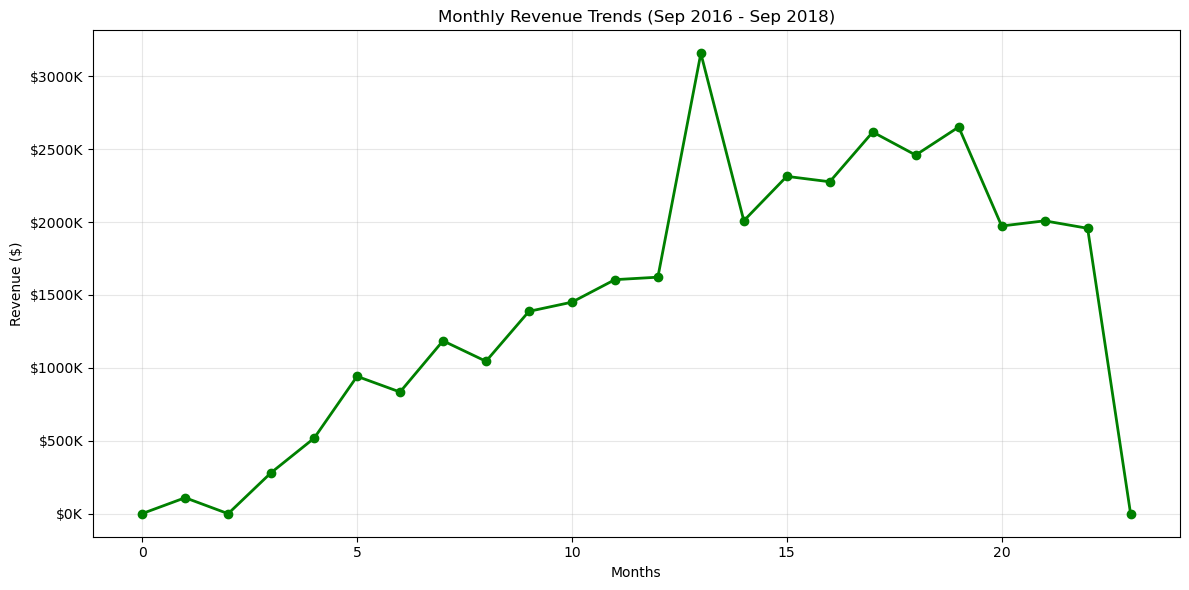

Best month: 2017-11 ($3,156,467.19)
Lowest month: 2018-09 ($235.74)


In [29]:
print("\n📈 1. MONTHLY REVENUE TRENDS")

# Group by month and calculate total revenue
monthly_revenue = master_df.groupby(master_df['order_purchase_timestamp'].dt.to_period('M'))['total_order_value'].sum()

plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_revenue)), monthly_revenue.values, marker='o', linewidth=2, color='green')
plt.title('Monthly Revenue Trends (Sep 2016 - Sep 2018)')
plt.xlabel('Months')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)

# Format y-axis to show currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

# Show some insights
max_month = monthly_revenue.idxmax()
min_month = monthly_revenue.idxmin()
print(f"Best month: {max_month} (${monthly_revenue.max():,.2f})")
print(f"Lowest month: {min_month} (${monthly_revenue.min():,.2f})")



📊 QUARTERLY REVENUE BREAKDOWN


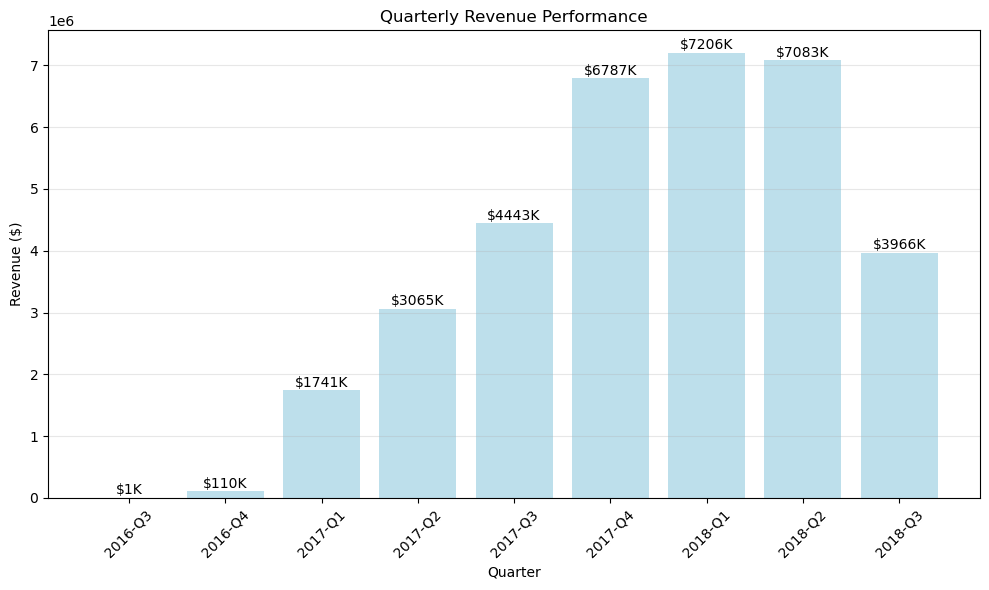

Quarterly revenue growth shows business expansion


In [30]:
print("\n📊 QUARTERLY REVENUE BREAKDOWN")

# Let's also look at quarterly performance
master_df['year_quarter'] = master_df['order_purchase_timestamp'].dt.year.astype(str) + '-Q' + master_df['order_purchase_timestamp'].dt.quarter.astype(str)
quarterly_revenue = master_df.groupby('year_quarter')['total_order_value'].sum().sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(quarterly_revenue)), quarterly_revenue.values, color='lightblue', alpha=0.8)
plt.title('Quarterly Revenue Performance')
plt.xlabel('Quarter')
plt.ylabel('Revenue ($)')
plt.xticks(range(len(quarterly_revenue)), quarterly_revenue.index, rotation=45)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10000,
             f'${height/1000:.0f}K', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Quarterly revenue growth shows business expansion")



🛍️ 2. CATEGORY PERFORMANCE


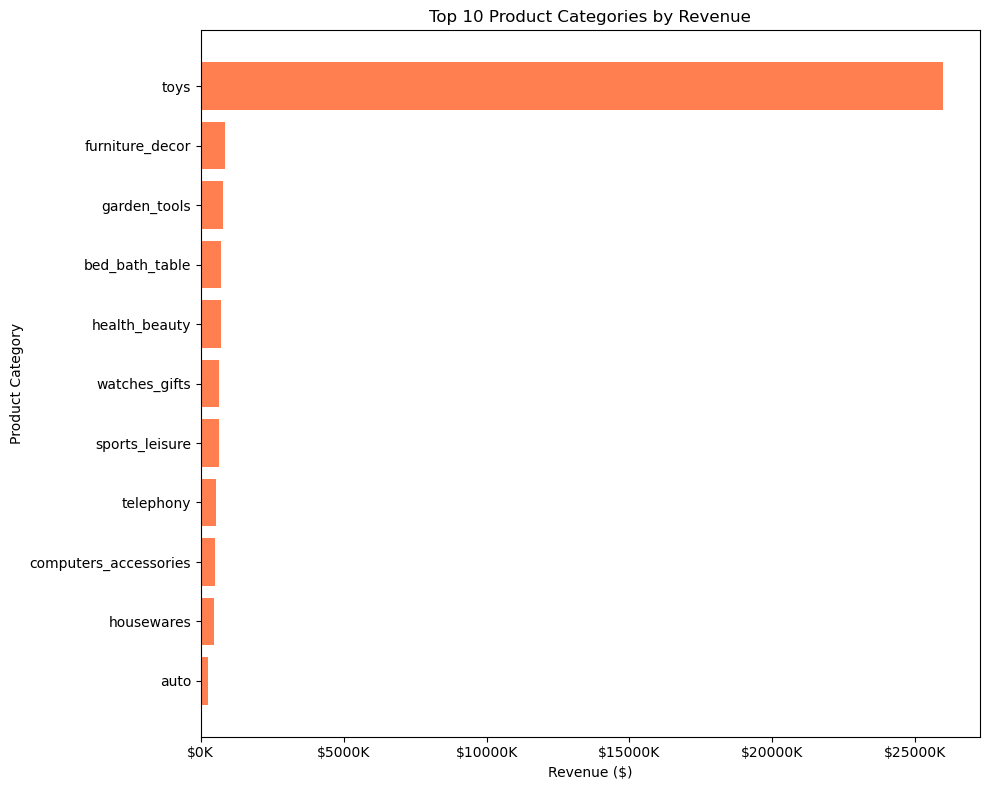

Top revenue category: toys
Revenue: $25,965,415.24


In [31]:
print("\n🛍️ 2. CATEGORY PERFORMANCE")

# Calculate revenue by product category
category_revenue = master_df.groupby('product_category_name')['total_order_value'].sum().sort_values(ascending=True)

# Get top 15 categories for better visualization
top_categories = category_revenue.tail(11)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_categories)), top_categories.values, color='coral')
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Product Category')
plt.yticks(range(len(top_categories)), top_categories.index)

# Format x-axis to show currency
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"Top revenue category: {category_revenue.index[-1]}")
print(f"Revenue: ${category_revenue.iloc[-1]:,.2f}")



💳 3. AVERAGE ORDER VALUE TRENDS


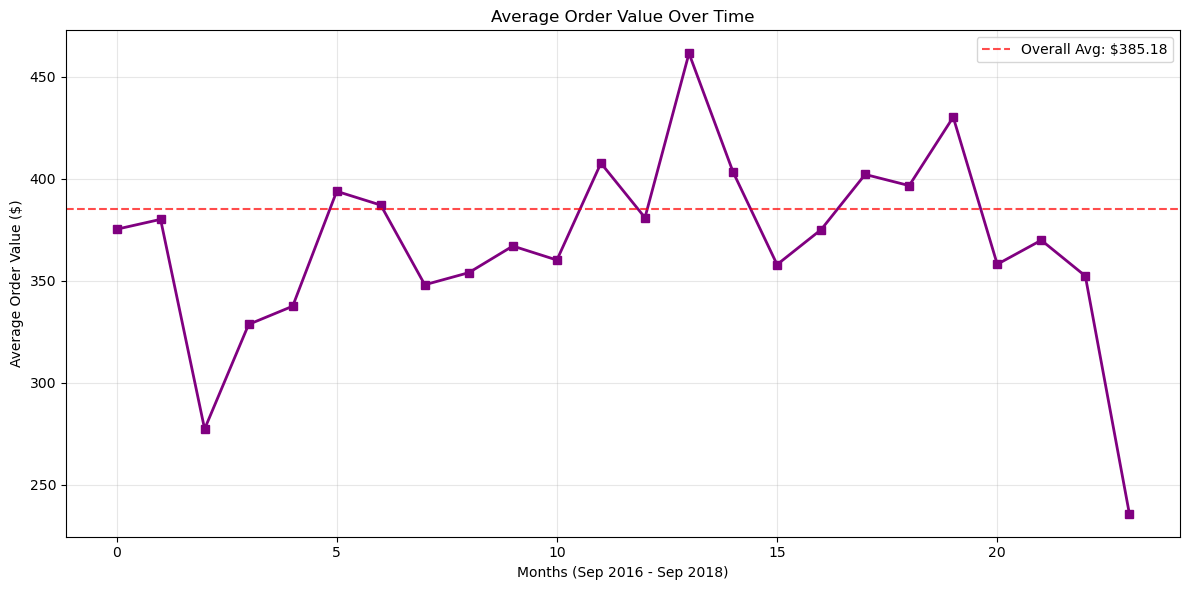

Overall average order value: $385.18
Highest monthly AOV: $461.47
Lowest monthly AOV: $235.74


In [32]:
print("\n💳 3. AVERAGE ORDER VALUE TRENDS")

# Calculate monthly average order value
monthly_aov = master_df.groupby(master_df['order_purchase_timestamp'].dt.to_period('M'))['total_order_value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(range(len(monthly_aov)), monthly_aov.values, marker='s', linewidth=2, color='purple')
plt.title('Average Order Value Over Time')
plt.xlabel('Months (Sep 2016 - Sep 2018)')
plt.ylabel('Average Order Value ($)')
plt.grid(True, alpha=0.3)

# Add horizontal line for overall average
overall_aov = master_df['total_order_value'].mean()
plt.axhline(y=overall_aov, color='red', linestyle='--', alpha=0.7, label=f'Overall Avg: ${overall_aov:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Overall average order value: ${overall_aov:.2f}")
print(f"Highest monthly AOV: ${monthly_aov.max():.2f}")
print(f"Lowest monthly AOV: ${monthly_aov.min():.2f}")


🗓️ SEASONAL AOV PATTERNS


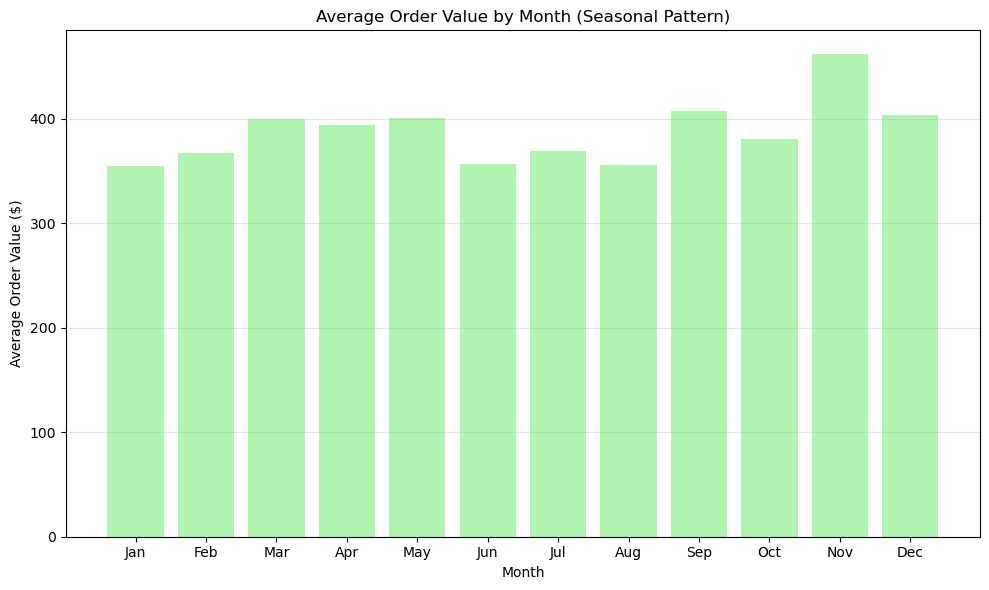

Highest AOV month: Month 11 ($461.47)
Lowest AOV month: Month 1 ($354.47)


In [33]:
print("\n🗓️ SEASONAL AOV PATTERNS")

# Look at AOV by month to see seasonal patterns
seasonal_aov = master_df.groupby(master_df['order_purchase_timestamp'].dt.month)['total_order_value'].mean()

plt.figure(figsize=(10, 6))
plt.bar(seasonal_aov.index, seasonal_aov.values, color='lightgreen', alpha=0.7)
plt.title('Average Order Value by Month (Seasonal Pattern)')
plt.xlabel('Month')
plt.ylabel('Average Order Value ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

highest_aov_month = seasonal_aov.idxmax()
lowest_aov_month = seasonal_aov.idxmin()
print(f"Highest AOV month: Month {highest_aov_month} (${seasonal_aov[highest_aov_month]:.2f})")
print(f"Lowest AOV month: Month {lowest_aov_month} (${seasonal_aov[lowest_aov_month]:.2f})")



💳 4. PAYMENT METHOD PREFERENCES


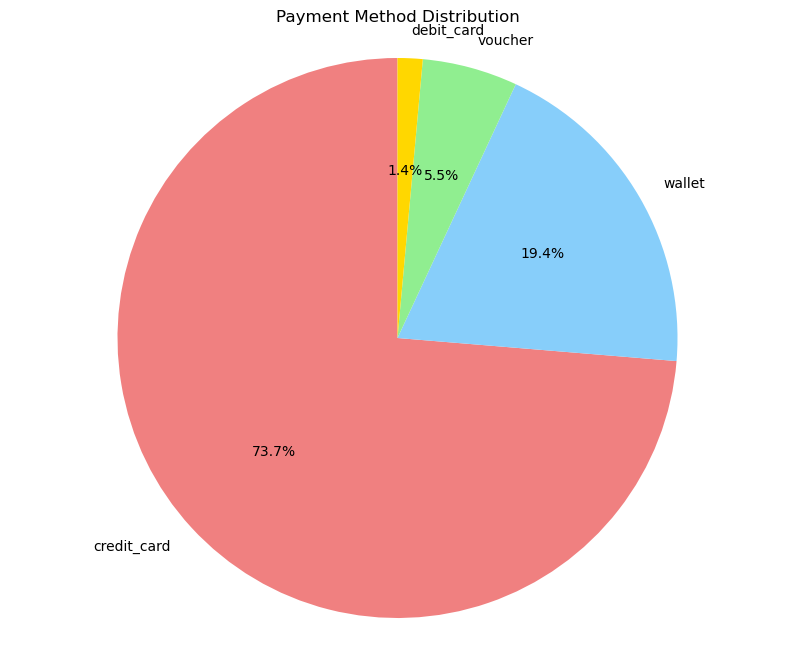

Payment method breakdown:
  credit_card: 65,814 orders (73.7%)
  wallet: 17,302 orders (19.4%)
  voucher: 4,911 orders (5.5%)
  debit_card: 1,289 orders (1.4%)


In [34]:
print("\n💳 4. PAYMENT METHOD PREFERENCES")

# Analyze payment methods
payment_counts = master_df['payment_type'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'plum']
plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%',
        colors=colors[:len(payment_counts)], startangle=90)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

print("Payment method breakdown:")
for method, count in payment_counts.items():
    percentage = (count / len(master_df)) * 100
    print(f"  {method}: {count:,} orders ({percentage:.1f}%)")



📈 PAYMENT METHOD TRENDS OVER TIME


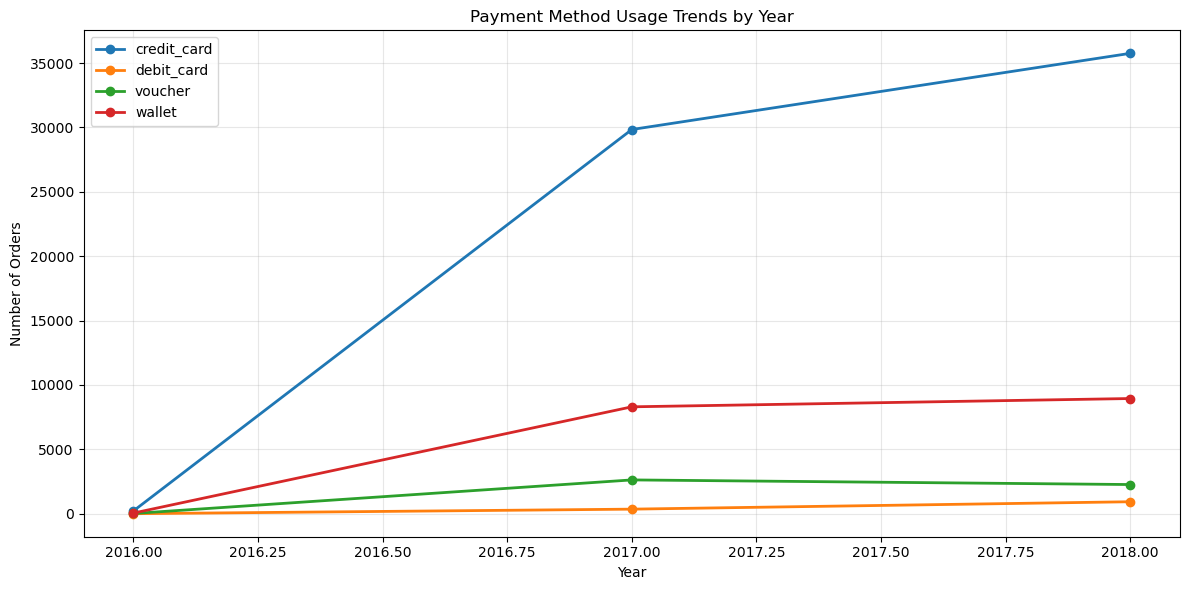

Payment trends show how customer preferences evolved over time


In [35]:
print("\n📈 PAYMENT METHOD TRENDS OVER TIME")

# Look at payment method trends by year
payment_trends = master_df.groupby([master_df['order_purchase_timestamp'].dt.year, 'payment_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
for payment_method in payment_trends.columns:
    plt.plot(payment_trends.index, payment_trends[payment_method],
             marker='o', label=payment_method, linewidth=2)

plt.title('Payment Method Usage Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Payment trends show how customer preferences evolved over time")


# How do seasonal trends affect order volumes and customer acquisition?

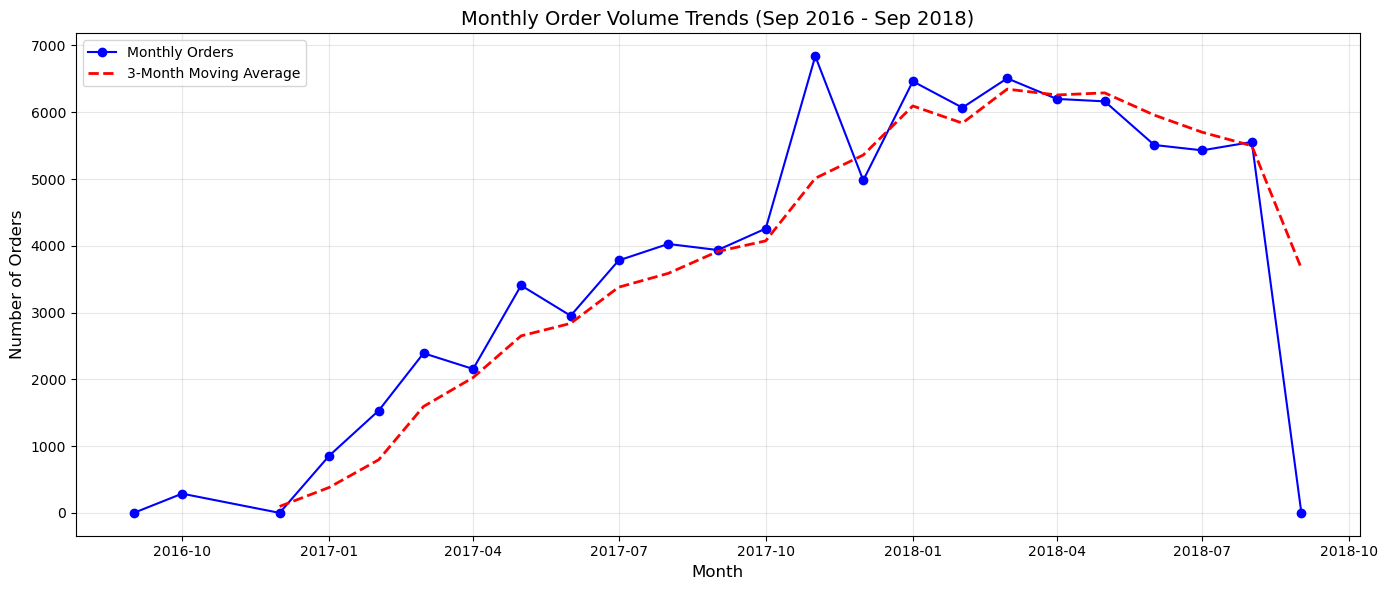

In [36]:
# --- Monthly Order Volume with Moving Average Overlay ---

# Convert purchase timestamp to month period
master_df['order_month'] = master_df['order_purchase_timestamp'].dt.to_period('M')

# Group orders by month
monthly_orders = master_df.groupby('order_month')['order_id'].nunique()

# Convert to DataFrame for plotting
monthly_orders = monthly_orders.to_timestamp()

# Calculate 3-month moving average
moving_avg = monthly_orders.rolling(window=3).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', color='blue', label='Monthly Orders')
plt.plot(moving_avg.index, moving_avg.values, color='red', linewidth=2, linestyle='--', label='3-Month Moving Average')

plt.title("Monthly Order Volume Trends (Sep 2016 - Sep 2018)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(loc='upper left', frameon=True)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


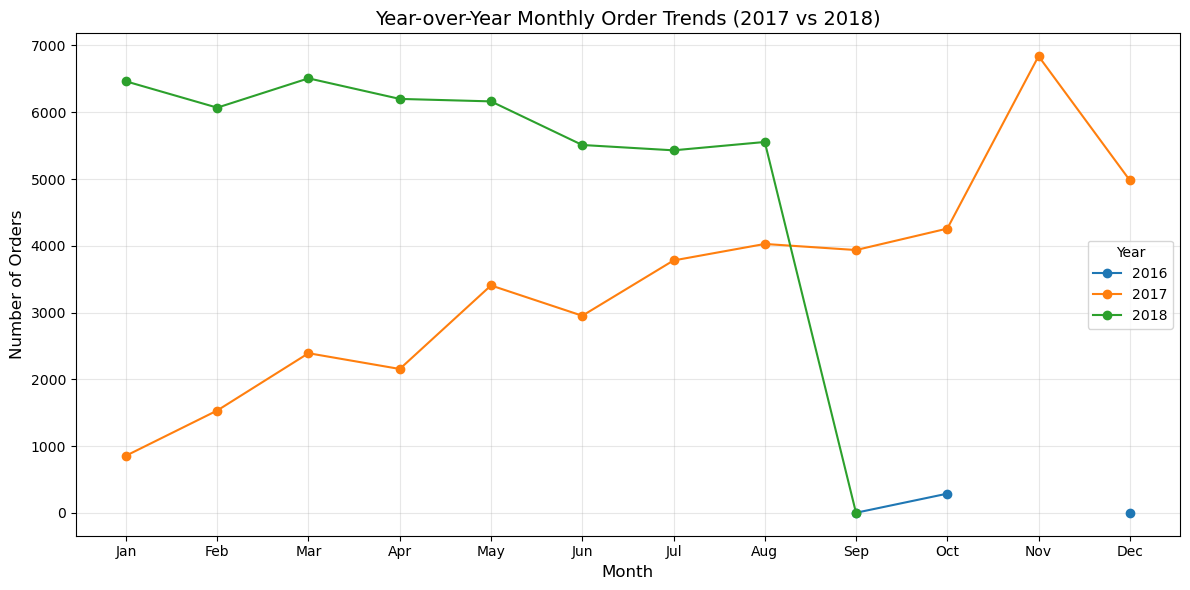

In [37]:
# --- Year-over-Year Monthly Seasonality Comparison ---

# Extract year and month
master_df['year'] = master_df['order_purchase_timestamp'].dt.year
master_df['month'] = master_df['order_purchase_timestamp'].dt.month_name().str[:3]  # Jan, Feb, etc.

# Group by year + month
monthly_yoy = master_df.groupby(['year','month'])['order_id'].nunique().reset_index()

# To preserve month order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_yoy['month'] = pd.Categorical(monthly_yoy['month'], categories=month_order, ordered=True)

# Pivot to wide format (months as x-axis, year as series)
monthly_yoy_pivot = monthly_yoy.pivot(index='month', columns='year', values='order_id')

# Plot
plt.figure(figsize=(12,6))
for year in monthly_yoy_pivot.columns:
    plt.plot(monthly_yoy_pivot.index, monthly_yoy_pivot[year], marker='o', label=str(year))

plt.title("Year-over-Year Monthly Order Trends (2017 vs 2018)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.legend(title="Year")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Product & Inventory Analysis:**

1.   Product Category Popularity: Treemap of sales volume

1.   Price Distribution Analysis: Histograms by category

2.   Product Dimensions vs. Pricing: Scatter plot matrix



2.   Seasonal Product Trends: Heatmap of category sales by month





## 5️⃣ Data Insights

- Summarize your main takeaways. What patterns or trends did you find?

In [38]:
print("\n🔍 KEY REVENUE INSIGHTS SUMMARY")
print("="*50)

# Calculate key metrics
total_revenue = master_df['total_order_value'].sum()
total_orders = len(master_df)
avg_order_value = master_df['total_order_value'].mean()

# Revenue growth
revenue_2017 = master_df[master_df['order_purchase_timestamp'].dt.year == 2017]['total_order_value'].sum()
revenue_2018 = master_df[master_df['order_purchase_timestamp'].dt.year == 2018]['total_order_value'].sum()
revenue_growth = ((revenue_2018 - revenue_2017) / revenue_2017) * 100

print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"📊 Total Orders: {total_orders:,}")
print(f"💳 Average Order Value: ${avg_order_value:.2f}")
print(f"🚀 Revenue Growth (2017-2018): {revenue_growth:.1f}%")
print(f"🏆 Top Revenue Category: {category_revenue.index[-1]}")
print(f"💳 Most Popular & Impactful Payment: {payment_counts.index[0]} ({payment_counts.iloc[0]:,} orders)")


🔍 KEY REVENUE INSIGHTS SUMMARY
💰 Total Revenue: $34,403,072.06
📊 Total Orders: 89,316
💳 Average Order Value: $385.18
🚀 Revenue Growth (2017-2018): 13.8%
🏆 Top Revenue Category: toys
💳 Most Popular & Impactful Payment: credit_card (65,814 orders)
